Let's model our data after processing.

In [36]:
import pandas as pd
db = pd.read_csv("../data/processed/cleaned_data.csv")

We will now define our target (what we want to predict, revenue in our case), and features (what is used to predict the target).

In [37]:
x = db.drop(columns=["Revenue"])
y = db['Revenue']

X represents our features / input.
Y represents our target / output.

The model doesn't understand words/strings, so we must encode them into numbers. Each  categorical column is replaced by multiple new cols, one per category (dummy variables).

 We drop the first category to avoid redundacy, as we can infer the first one is true if all others are false. (Ex: Country: m/f -> Country_m: True/False. No need for Country_f)

In [38]:
print("X without dummies:")
print(x.head())

x = pd.get_dummies(x, drop_first=True)

print("\n\n\nX with dummies:")
print(x.head())

X without dummies:
   Year  Month  Customer Age Customer Gender        Country       State  \
0  2016      2          29.0               f  United States  Washington   
1  2016      2          29.0               f  United States  Washington   
2  2016      2          29.0               f  United States  Washington   
3  2016      3          29.0               f  United States  Washington   
4  2016      3          29.0               f  United States  Washington   

  Product Category     Sub Category  Quantity  Unit Cost  Unit Price   Cost  \
0      Accessories  Tires and Tubes       1.0      80.00  109.000000   80.0   
1         Clothing           Gloves       2.0      24.50   28.500000   49.0   
2      Accessories  Tires and Tubes       3.0       3.67    5.000000   11.0   
3      Accessories  Tires and Tubes       2.0      87.50  116.500000  175.0   
4      Accessories  Tires and Tubes       3.0      35.00   41.666667  105.0   

   DayOfWeek  Profit Margin  
0          4      29.0000

In [39]:
print(x.columns.tolist())

['Year', 'Month', 'Customer Age', 'Quantity', 'Unit Cost', 'Unit Price', 'Cost', 'DayOfWeek', 'Profit Margin', 'Customer Gender_m', 'Country_Germany', 'Country_United Kingdom', 'Country_United States', 'State_Arizona', 'State_Bayern', 'State_Brandenburg', 'State_California', 'State_Charente-Maritime', 'State_England', 'State_Essonne', 'State_Florida', 'State_Garonne (Haute)', 'State_Georgia', 'State_Hamburg', 'State_Hauts de Seine', 'State_Hessen', 'State_Illinois', 'State_Kentucky', 'State_Loir et Cher', 'State_Loiret', 'State_Massachusetts', 'State_Minnesota', 'State_Mississippi', 'State_Missouri', 'State_Montana', 'State_Moselle', 'State_New York', 'State_Nord', 'State_Nordrhein-Westfalen', 'State_North Carolina', 'State_Ohio', 'State_Oregon', 'State_Pas de Calais', 'State_Saarland', 'State_Seine (Paris)', 'State_Seine Saint Denis', 'State_Seine et Marne', 'State_Somme', 'State_South Carolina', 'State_Texas', 'State_Utah', "State_Val d'Oise", 'State_Val de Marne', 'State_Virginia', 

We now need to split the data. Why? We can't test the model on the data it trained on, as it could cheat, so we exclude some data from the training data to be used for testing later.

We set aside 20% of the data for testing.

In [40]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

Now time for the exciting part, training the model. It is easy using scikitLearn. For simple data like ours, we can use basic LinearRegression model.

In [41]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


So, is it good, or even working? Let's evaluate.

In [42]:
y_pred = model.predict(x_test)

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", pd.Series(mean_squared_error(y_test, y_pred)).pow(0.5).iloc[0])
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 34.50387929187516
RMSE: 60.661287924114156
R2 Score: 0.9932158085795341


Let's interpret the results.

- MAE (Mean Absolute Error): Mean away from true value. Lower is better.
  We are $33.50 off of the real value on average.

- RMSE (Root Mean Squared Error): Similar to MAE but penalizes big errors more (it squares them before averaging). So a few really bad predictions can maek RMSE goes up faster than MAE.
  Our RSME is $60.66.

- R2 (R-Squared Score): How well the model explains the variance in the data. 0 explains none of the variance, 0.99 explains 99% of the variance, adn 1 explains 100% of the variance.
  Ours is 0.9932.

We can also look at a scatterplot to determine our model's success. The closer to a diagonal, the better.

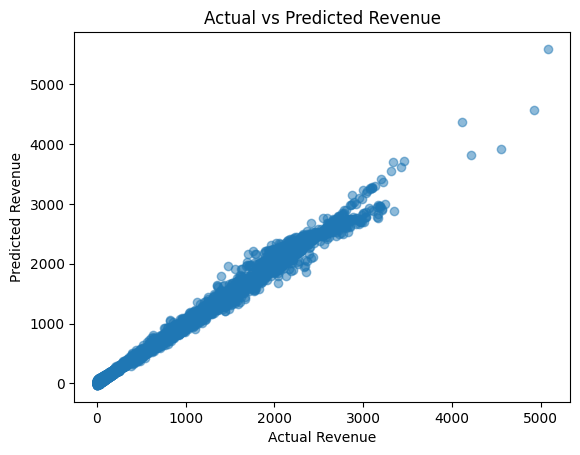

In [44]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted Revenue")
plt.show()

Finally, let's save our model.

In [45]:
import os
import joblib

os.makedirs('models', exist_ok=True)
joblib.dump(model, '../models/model.pkl')
print("Model saved to models/model.pkl")

Model saved to models/model.pkl
